# Assignment 3

Nurul Tyas Rahmadani

PYTN050ONL008

Data Preparation

Import semua library yang diperlukan

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats
pd.set_option('display.max.columns',None)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

Load Dataset

In [2]:
# Load Data Set
df_bank = pd.read_csv('./dataset/bank/bank-additional.csv',sep=";")
print ('Data read into a pandas dataframe!')
df_bank

Data read into a pandas dataframe!


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


Melihat 5 baris teratas dataset

In [3]:
# View top 5 rows dataset
df_bank_top5 = df_bank.head(5)
df_bank_top5

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Melihat 5 baris terbawah dataset

In [4]:
# View bottom 5 rows dataset
df_bank_tail5 = df_bank.tail(5)
df_bank_tail5

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


Mengetahui ukuran dataset

In [5]:
# Shape of dataset
df_bank_shape = df_bank.shape
df_bank_shape

(4119, 21)

Mengetahui info mengenai type masing-masing kolom pada dataset

In [6]:
# Info dataset
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

Memilih feature untuk proses prediksi:

In [7]:
listfeatures = ['age','job','marital','education','housing','loan']
df_bank[listfeatures].describe()

,age
count,4119.000000
mean,40.113620
std,10.313362
min,18.000000
25%,32.000000
50%,38.000000
75%,47.000000
max,88.000000


In [8]:
for i in listfeatures:
    print(df_bank[i].value_counts(),'\n')

32    216
31    191
30    177
34    174
35    172
     ... 
82      2
86      2
88      1
19      1
85      1
Name: age, Length: 67, dtype: int64 

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64 

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64 

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64 

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64 

no         3349
yes         665
unknown     105
Name: loan, dtype: int64 



dari proses running di atas dapat dilihat data pencilan seperti pada "education" ada 1 illiterate, data pencilan ini dapat dihilangkan. data "unknown" tidak dihilangkan karena jumlahnya cukup besar

In [9]:
df_bank[(df_bank['education']!='illiterate')][listfeatures].head()

,age,job,marital,education,housing,loan
0,30,blue-collar,married,basic.9y,yes,no
1,39,services,single,high.school,no,no
2,25,services,married,high.school,yes,no
3,38,services,married,basic.9y,unknown,unknown
4,47,admin.,married,university.degree,yes,no


In [10]:
print('total data after delete unused rows: ', len(df_bank[(df_bank['education']!='illiterate')][listfeatures]))

total data after delete unused rows:  4118


Mengetahui ada tidaknya missing value

In [11]:
missing = df_bank.isnull().sum()/len(df_bank)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df_bank.isnull().sum()[df_bank.isnull().sum()>1000])], index=['percent missing','how many missing']))

Empty DataFrame
Columns: []
Index: [percent missing, how many missing]


tidak adanya missing value pada data ini

In [12]:
#mengecek kembali data df_bank
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


Daftar kolom yang akan diubah menjadi kategorical

Konversi dulu data y yang berupa 'yes' dan 'no' menjadi numerik 0 dan 1. agar lebih mudah saat perhitungan/prediksi

In [13]:
from sklearn.preprocessing import LabelEncoder
y = df_bank['y'].values
print('data y sebelum konversi: ',y)
label_y_encoder = LabelEncoder().fit(y)
y_konversi = label_y_encoder.transform(y)
print('data y setelah konversi: ',y_konversi)
print('class before transform: ',label_y_encoder.classes_)

data y sebelum konversi:  ['no' 'no' 'no' ... 'no' 'no' 'no']
data y setelah konversi:  [0 0 0 ... 0 0 0]
class before transform:  ['no' 'yes']


Konversi dulu data feature ke bentuk numerik jika datanya masih kategorikal (konversi seperti data y)

Data feature yang akan digunakan adalah data age dan data job. untuk age karena sudah numerik tidak perlu di konversi lagi

In [14]:
data_job = df_bank['job'].values
print('data job 1 sebelum konversi: ',data_job)
label_datajob_encoder = LabelEncoder().fit(data_job)
data_job_konversi = label_datajob_encoder.transform(data_job)
print('data feature job setelah konversi: ',data_job_konversi)
print('class before transform: ',label_datajob_encoder.classes_)

data_marital = df_bank['marital'].values
print('data marital 1 sebelum konversi: ',data_marital)
label_datamarital_encoder = LabelEncoder().fit(data_marital)
data_marital_konversi = label_datamarital_encoder.transform(data_marital)
print('data feature marital setelah konversi: ',data_marital_konversi)
print('class before transform: ',label_datamarital_encoder.classes_)


data_education = df_bank['education'].values
print('data education 1 sebelum konversi: ',data_education)
label_dataeducation_encoder = LabelEncoder().fit(data_education)
data_education_konversi = label_dataeducation_encoder.transform(data_education)
print('data feature education setelah konversi: ',data_education_konversi)
print('class before transform: ',label_dataeducation_encoder.classes_)


data_default = df_bank['default'].values
print('data default 1 sebelum konversi: ',data_default)
label_datadefault_encoder = LabelEncoder().fit(data_default)
data_default_konversi = label_datadefault_encoder.transform(data_default)
print('data feature default setelah konversi: ',data_default_konversi)
print('class before transform: ',label_datadefault_encoder.classes_)


data_housing = df_bank['housing'].values
print('data housing 1 sebelum konversi: ',data_housing)
label_datahousing_encoder = LabelEncoder().fit(data_housing)
data_housing_konversi = label_datahousing_encoder.transform(data_housing)
print('data feature housing setelah konversi: ',data_housing_konversi)
print('class before transform: ',label_datahousing_encoder.classes_)


data_loan = df_bank['loan'].values
print('data loan 1 sebelum konversi: ',data_loan)
label_dataloan_encoder = LabelEncoder().fit(data_loan)
data_loan_konversi = label_dataloan_encoder.transform(data_loan)
print('data feature loan setelah konversi: ',data_loan_konversi)
print('class before transform: ',label_dataloan_encoder.classes_)


data job 1 sebelum konversi:  ['blue-collar' 'services' 'services' ... 'student' 'admin.' 'management']
data feature job setelah konversi:  [1 7 7 ... 8 0 4]
class before transform:  ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
data marital 1 sebelum konversi:  ['married' 'single' 'married' ... 'single' 'married' 'single']
data feature marital setelah konversi:  [1 2 1 ... 2 1 2]
class before transform:  ['divorced' 'married' 'single' 'unknown']
data education 1 sebelum konversi:  ['basic.9y' 'high.school' 'high.school' ... 'high.school' 'high.school'
 'high.school']
data feature education setelah konversi:  [2 3 3 ... 3 3 3]
class before transform:  ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
data default 1 sebelum konversi:  ['no' 'no' 'no' ... 'no' 'no' 'no']
data feature default setelah konversi:  [0 0 0 ... 0

Proses penambahan kolom pada data frame df_bank

In [15]:
df_bank['y_konversi'] = y_konversi
df_bank['data_job_konversi'] = data_job_konversi
df_bank['data_marital_konversi'] = data_marital_konversi
df_bank['data_education_konversi'] = data_education_konversi
df_bank['data_default_konversi'] = data_default_konversi
df_bank['data_housing_konversi'] = data_housing_konversi
df_bank['data_loan_konversi'] = data_loan_konversi
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_konversi,data_job_konversi,data_marital_konversi,data_education_konversi,data_default_konversi,data_housing_konversi,data_loan_konversi
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,1,1,2,0,2,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,7,2,3,0,0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,7,1,3,0,2,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,7,1,2,0,1,1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,1,6,0,2,0


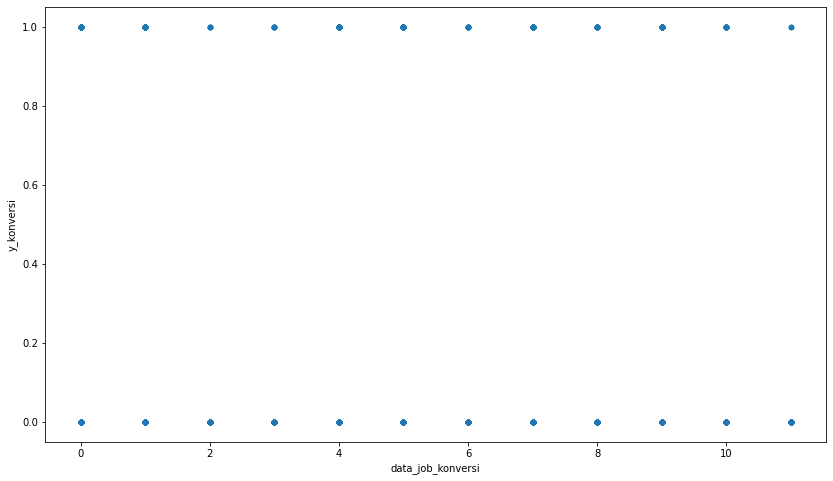

In [16]:
df_job_target = df_bank[['y_konversi','data_job_konversi']]
df_job_target.plot(kind='scatter', x='data_job_konversi', y='y_konversi', figsize=(14,8))
plt.show()

In [17]:
df_bank.groupby(by=['y_konversi'])['data_job_konversi'].count()

y_konversi
0    3668
1     451
Name: data_job_konversi, dtype: int64

In [18]:
df_bank.groupby(by=['y_konversi','data_job_konversi'])['data_job_konversi'].count()

y_konversi  data_job_konversi
0           0                    879
            1                    823
            2                    140
            3                     99
            4                    294
            5                    128
            6                    146
            7                    358
            8                     63
            9                    611
            10                    92
            11                    35
1           0                    133
            1                     61
            2                      8
            3                     11
            4                     30
            5                     38
            6                     13
            7                     35
            8                     19
            9                     80
            10                    19
            11                     4
Name: data_job_konversi, dtype: int64

In [19]:
job_konv_group = df_bank.groupby(by=['job','y'])['job'].count()
job_konv_group

job            y  
admin.         no     879
               yes    133
blue-collar    no     823
               yes     61
entrepreneur   no     140
               yes      8
housemaid      no      99
               yes     11
management     no     294
               yes     30
retired        no     128
               yes     38
self-employed  no     146
               yes     13
services       no     358
               yes     35
student        no      63
               yes     19
technician     no     611
               yes     80
unemployed     no      92
               yes     19
unknown        no      35
               yes      4
Name: job, dtype: int64

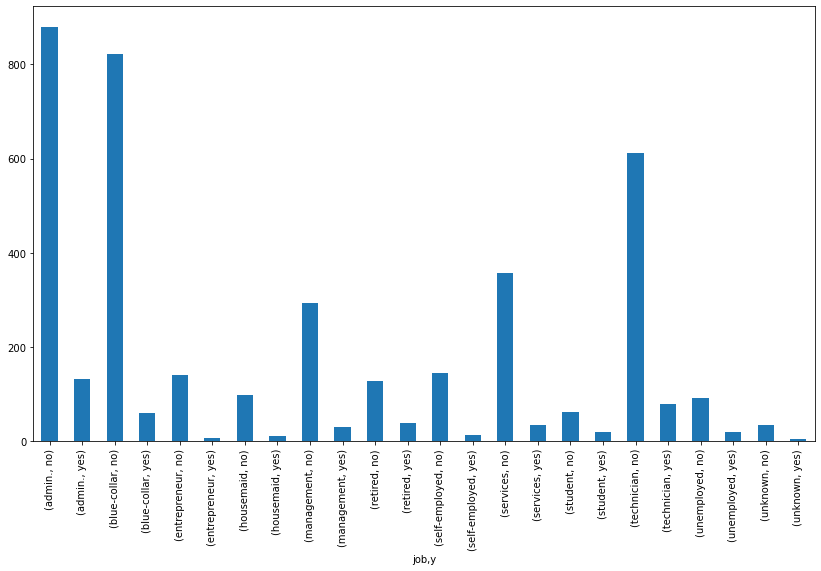

In [20]:
job_konv_group.plot(kind='bar',figsize=(14,8))
plt.show()

Proses pengaturan data dan untuk mengetahui shape data

Proses pemodelan :
    menentukan k atau neighbors
    input data feature bank dan target y

Pemodelan dengan menggunakan 2 feature yaitu : age dan job
Pemodelan dengan menggunakan 7 feature : age, job, marital, education, default, housing, loan

In [21]:
data_feature_bank = df_bank[['age','data_job_konversi']].values
print('data feature:',data_feature_bank )
print('shape data feature:',data_feature_bank.shape )

target_y_konversi = df_bank[['y_konversi']].values.reshape(len(y_konversi))
print('data y:',target_y_konversi )
print('shape data y:',target_y_konversi.shape )

data feature: [[30  1]
 [39  7]
 [25  7]
 ...
 [27  8]
 [58  0]
 [34  4]]
shape data feature: (4119, 2)
data y: [0 0 0 ... 0 0 0]
shape data y: (4119,)


In [22]:
data_7feature_bank = df_bank[['age','data_job_konversi','data_marital_konversi','data_education_konversi','data_default_konversi','data_housing_konversi','data_loan_konversi']].values
print('data 7 feature:',data_7feature_bank )
print('shape data 7 feature:',data_7feature_bank.shape )

target_y_konversi_7f = df_bank[['y_konversi']].values.reshape(len(y_konversi))
print('data y:',target_y_konversi )
print('shape data y:',target_y_konversi.shape )

data 7 feature: [[30  1  1 ...  0  2  0]
 [39  7  2 ...  0  0  0]
 [25  7  1 ...  0  2  0]
 ...
 [27  8  2 ...  0  0  0]
 [58  0  1 ...  0  0  0]
 [34  4  2 ...  0  2  0]]
shape data 7 feature: (4119, 7)
data y: [0 0 0 ... 0 0 0]
shape data y: (4119,)


Metode k-NN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

model_ykonv = KNeighborsClassifier(n_neighbors=5).fit(data_feature_bank,target_y_konversi)

model_ykonv_7f = KNeighborsClassifier(n_neighbors=5).fit(data_7feature_bank,target_y_konversi_7f)

Hasil prediksi dari model y yang sudah diperoleh

In [24]:
prediksi_ykonv = model_ykonv.predict(data_feature_bank)
print(prediksi_ykonv)


prediksi_ykonv_7f = model_ykonv_7f.predict(data_7feature_bank)
print(prediksi_ykonv_7f)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Menentukan performance model dengan melihat nilai score

In [25]:
performance_model = model_ykonv.score(data_feature_bank,target_y_konversi)
print('performance model : ',performance_model)

performance_model_7f = model_ykonv_7f.score(data_7feature_bank,target_y_konversi_7f)
print('performance model 7 features : ',performance_model_7f)

performance model :  0.8922068463219228
performance model 7 features :  0.896091284292304


proses looping untuk meningkatkan nilai neighbors dan mencari nilai neighbors yang optimal

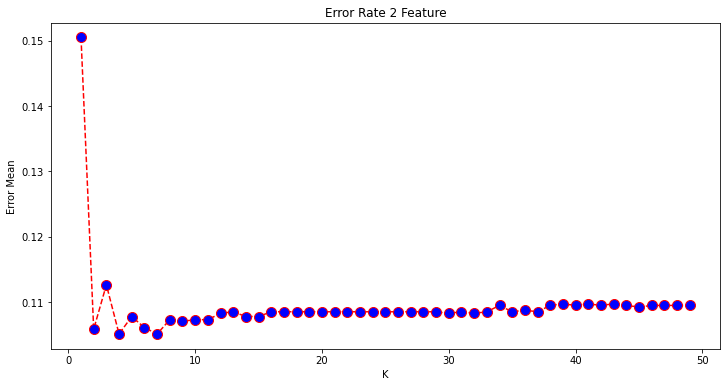

In [26]:
error = []
neighbors_loop = range(1,50)
for x in neighbors_loop:
    model_ykonv_loop = KNeighborsClassifier(n_neighbors=x).fit(data_feature_bank,target_y_konversi)
    prediksi_ykonv_loop = model_ykonv_loop.predict(data_feature_bank)
    error.append(np.mean(prediksi_ykonv_loop!=target_y_konversi))
plt.figure(figsize=(12,6))
plt.plot(neighbors_loop,error, color = 'red', linestyle = 'dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate 2 Feature')
plt.xlabel('K')
plt.ylabel('Error Mean')
plt.show()

dari grafik tersebut diperoleh nilai error yang paling kecil di neighbor = 4. Sehingga jika nilai neighbor =4, maka nilai performance model (score) akan meningkat.

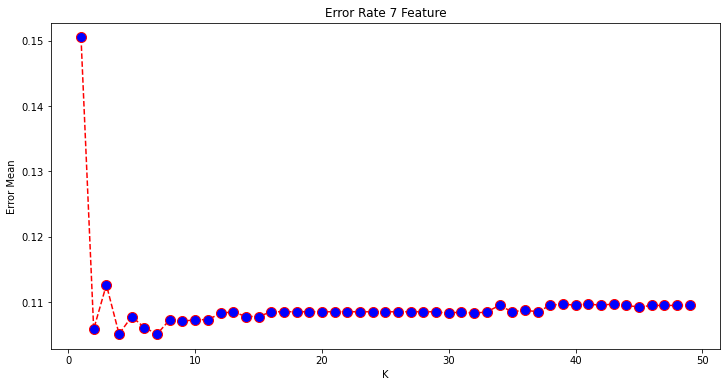

In [27]:
error_7f = []
neighbors_loop = range(1,50)
for x in neighbors_loop:
    model_ykonv_loop_7f = KNeighborsClassifier(n_neighbors=x).fit(data_7feature_bank,target_y_konversi_7f)
    prediksi_ykonv_loop_7f = model_ykonv_loop_7f.predict(data_7feature_bank)
    error_7f.append(np.mean(prediksi_ykonv_loop_7f!=target_y_konversi_7f))
plt.figure(figsize=(12,6))
plt.plot(neighbors_loop,error, color = 'red', linestyle = 'dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate 7 Feature')
plt.xlabel('K')
plt.ylabel('Error Mean')
plt.show()

dari grafik tersebut diperoleh nilai error yang paling kecil di neighbor = 4. Sehingga jika nilai neighbor =4, maka nilai performance model (score) akan meningkat.

In [28]:
from sklearn.model_selection import train_test_split
features_data = df_bank[['age','data_job_konversi']].values
target_data = df_bank[['y_konversi']].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(features_data,target_data,test_size=0.25)
y_test = y_test.reshape(len(y_test))
y_train = y_train.reshape(len(y_train))
print('shape feature total: ', features_data.shape)
print('shape feature train: ', x_train.shape)
print('shape feature test: ', x_test.shape)
print('shape target test: ', y_test.shape)

shape feature total:  (4119, 2)
shape feature train:  (3089, 2)
shape feature test:  (1030, 2)
shape target test:  (1030,)


In [29]:
features_7f_data = df_bank[['age','data_job_konversi','data_marital_konversi','data_education_konversi','data_default_konversi','data_housing_konversi','data_loan_konversi']].values
target_7f_data = df_bank[['y_konversi']].values.reshape(-1,1)

x_7f_train,x_7f_test,y_7f_train,y_7f_test = train_test_split(features_7f_data,target_7f_data,test_size=0.25)
y_7f_test = y_7f_test.reshape(len(y_7f_test))
y_7f_train = y_7f_train.reshape(len(y_7f_train))
print('shape feature total: ', features_7f_data.shape)
print('shape feature train: ', x_7f_train.shape)
print('shape feature test: ', x_7f_test.shape)
print('shape target test: ', y_7f_test.shape)

shape feature total:  (4119, 7)
shape feature train:  (3089, 7)
shape feature test:  (1030, 7)
shape target test:  (1030,)


Dengan cara yang sama akan dilakukan prediksi dengan menggunakan metode lain seperti Gaussian Naive Bayes, Random Forest, dan Decision Tree. 

Metode Gaussian Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB().fit(x_train,y_train)
model_7f_GNB = GaussianNB().fit(x_7f_train,y_7f_train)

In [31]:
y_train_prediksi_GNB = model_GNB.predict(x_train)
print(y_train_prediksi_GNB)


y_7f_train_prediksi_GNB = model_7f_GNB.predict(x_7f_train)
print(y_7f_train_prediksi_GNB)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 1 0]


In [32]:
perf_model_GNB = model_GNB.score(x_train,y_train)
print('performance model GNB : ',perf_model_GNB)


perf_model_7f_GNB = model_7f_GNB.score(x_7f_train,y_7f_train)
print('performance model 7 features GNB : ',perf_model_7f_GNB)

performance model GNB :  0.8870184525736484
performance model 7 features GNB :  0.8947879572677242


In [33]:
conf_matrix_GNB = confusion_matrix(y_train,y_train_prediksi_GNB)
print(conf_matrix_GNB)

conf_matrix_7f_GNB = confusion_matrix(y_7f_train,y_7f_train_prediksi_GNB)
print(conf_matrix_7f_GNB)


[[2726   17]
 [ 332   14]]
[[2747   12]
 [ 313   17]]


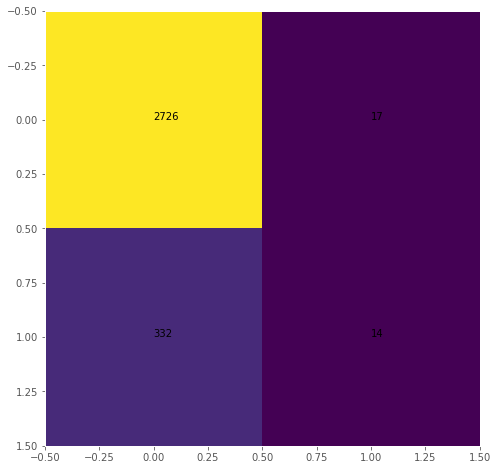

In [34]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_GNB)
ax.grid(False)
for i in range (len(conf_matrix_GNB[0])):
    for j in range (len(conf_matrix_GNB[0])):
        ax.text(j,i,conf_matrix_GNB[i,j])
plt.show()

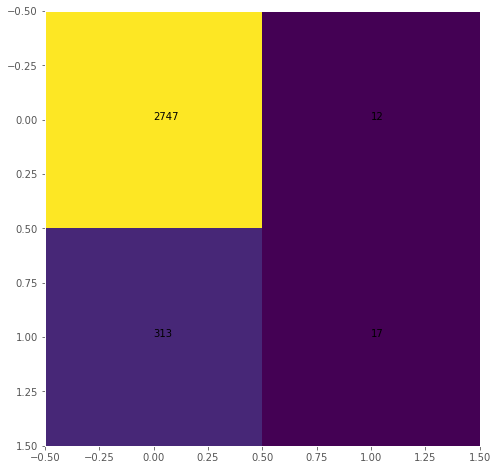

In [35]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_7f_GNB)
ax.grid(False)
for i in range (len(conf_matrix_7f_GNB[0])):
    for j in range (len(conf_matrix_7f_GNB[0])):
        ax.text(j,i,conf_matrix_7f_GNB[i,j])
plt.show()

Model Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier().fit(x_train,y_train)


model_7f_RF = RandomForestClassifier().fit(x_7f_train,y_7f_train)

In [37]:
y_train_prediksi_RF = model_RF.predict(x_train)
print(y_train_prediksi_RF)


y_train_prediksi_7f_RF = model_7f_RF.predict(x_7f_train)
print(y_train_prediksi_7f_RF)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 1]


In [38]:
perf_model_RF = model_RF.score(x_train,y_train)
print('performance model RF : ',perf_model_RF)


perf_model_7f_RF = model_7f_RF.score(x_7f_train,y_7f_train)
print('performance model RF 7 features : ',perf_model_7f_RF)

performance model RF :  0.8993201683392684
performance model RF 7 features :  0.9592101003561023


In [39]:
conf_matrix_RF = confusion_matrix(y_train,y_train_prediksi_RF)
print(conf_matrix_RF)


conf_matrix_7f_RF = confusion_matrix(y_7f_train,y_train_prediksi_7f_RF)
print(conf_matrix_7f_RF)

[[2723   20]
 [ 291   55]]
[[2744   15]
 [ 111  219]]


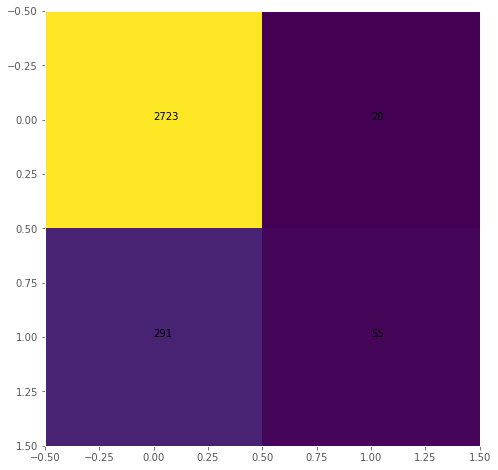

In [40]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_RF)
ax.grid(False)
for i in range (len(conf_matrix_RF[0])):
    for j in range (len(conf_matrix_RF[0])):
        ax.text(j,i,conf_matrix_RF[i,j])
plt.show()

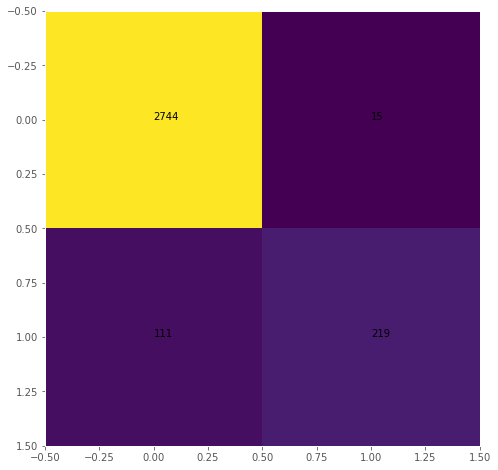

In [41]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_7f_RF)
ax.grid(False)
for i in range (len(conf_matrix_7f_RF[0])):
    for j in range (len(conf_matrix_7f_RF[0])):
        ax.text(j,i,conf_matrix_7f_RF[i,j])
plt.show()

Model Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier().fit(x_train,y_train)


model_7f_DT = DecisionTreeClassifier().fit(x_7f_train,y_7f_train)

In [43]:
y_train_prediksi_DT = model_DT.predict(x_train)
print(y_train_prediksi_DT)

y_train_prediksi_7f_DT = model_7f_DT.predict(x_7f_train)
print(y_train_prediksi_7f_DT)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 1]


In [44]:
perf_model_DT = model_DT.score(x_train,y_train)
print('performance model DT: ',perf_model_DT)


perf_model_7f_DT = model_7f_DT.score(x_7f_train,y_7f_train)
print('performance model DT 7 features: ',perf_model_7f_DT)

performance model DT:  0.8993201683392684
performance model DT 7 features:  0.9592101003561023


In [45]:
conf_matrix_DT = confusion_matrix(y_train,y_train_prediksi_DT)
print(conf_matrix_DT)

conf_matrix_7f_DT = confusion_matrix(y_7f_train,y_train_prediksi_7f_DT)
print(conf_matrix_7f_DT)

[[2732   11]
 [ 300   46]]
[[2754    5]
 [ 121  209]]


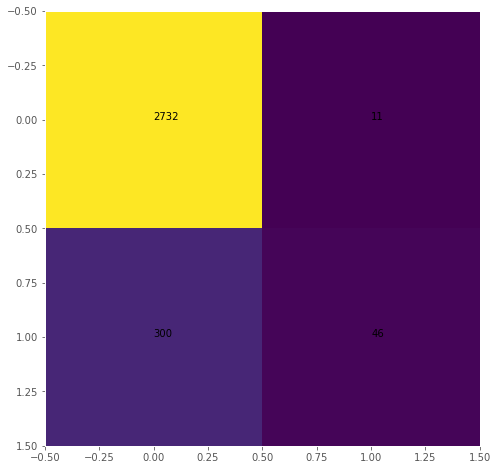

In [46]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_DT)
ax.grid(False)
for i in range (len(conf_matrix_DT[0])):
    for j in range (len(conf_matrix_DT[0])):
        ax.text(j,i,conf_matrix_DT[i,j])
plt.show()

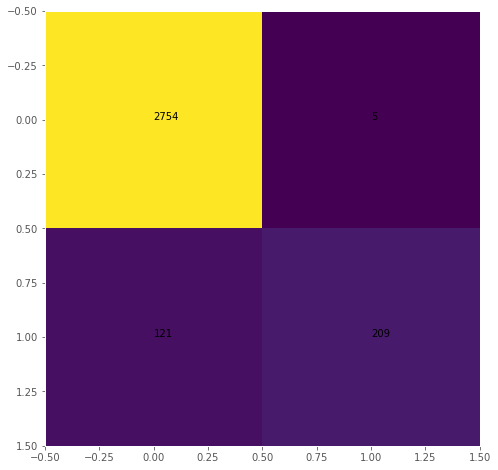

In [47]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_7f_DT)
ax.grid(False)
for i in range (len(conf_matrix_7f_DT[0])):
    for j in range (len(conf_matrix_7f_DT[0])):
        ax.text(j,i,conf_matrix_7f_DT[i,j])
plt.show()

Hasil Performance Score:

Hasil Score dari model-model dengan menggunakan 2 features (age dan job)

In [48]:
rekap_score = {'Model':['k-NN', 'Gaussian Naive Bayes', 'Random Forest', 'Decision Tree'], 
        'Score':[performance_model, perf_model_GNB, perf_model_RF, perf_model_DT]} 
output_rekap_score = pd.DataFrame(rekap_score)
output_rekap_score

,Model,Score
0,k-NN,0.892207
1,Gaussian Naive Bayes,0.887018
2,Random Forest,0.899320
3,Decision Tree,0.899320


Hasil Score dari model-model dengan menggunakan 7 features (age, job, marital, education, default, housing, loan)

In [49]:
rekap_score_7f = {'Model':['k-NN', 'Gaussian Naive Bayes', 'Random Forest', 'Decision Tree'], 
        'Score':[performance_model_7f, perf_model_7f_GNB, perf_model_7f_RF, perf_model_7f_DT]} 
output_rekap_score_7f = pd.DataFrame(rekap_score_7f)
output_rekap_score_7f

,Model,Score
0,k-NN,0.896091
1,Gaussian Naive Bayes,0.894788
2,Random Forest,0.959210
3,Decision Tree,0.959210


Kesimpulan:

1. Nilai performance yang paling bagus menggunakan metode Random Forest dan Decision Tree (baik yang menggunakan 2 ataupun 7 features)

2. Pada kasus ini, performance score untuk yang menggunakan 7 features lebih baik daripada dengan menggunakan 2 features.